# Milestone 2

In [1]:
#importing modules for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Get current working directory for reference
os.getcwd()

'C:\\Users\\samff\\Cosc301Path\\group07-Project\\analysis\\Sam'

## Task 1

### Preliminary exploration

In [3]:
# Loading raw data from local directory using Pandas, while deleting the incorrect
# formatted index row associated with loading from the CSV filetype.
df = pd.read_csv('C:\\Users\\samff\\Cosc301Path\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv',index_col=0)

In [4]:
#gives a brief description of frequency of the data row assignment(s), and the amount of unique data in regard to rows. 
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,82,3,8,5,57,12,12,12,12,11,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [5]:
#gives a more readable description of the data, including unique values in each column, 
#which will scope what kind of cleaning that needs to be done, and what trends or relationships
#are present in this data to get a better idea of what we wish to analyze in our process.

df.describe(exclude=np.number).T

,count,unique,top,freq
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455
X10,30001,11,0,16947


While the describe functions are exceptional at visualizing data to train our data cleaning methods,
and provide some guidance into what questions should we be asking ourselves whilst performing said analysis. 
Numerically it can be observed in the above printed data descriptions oh some relationships inherented from basic
statistics, however intellectually, the specified column names as variables X1-X23 and associative Y variable offer
nothing in the way of observation or a physical relationship, as there is no relative description of what these numbers specify.

### Data Cleaning and processing for clarity

In [6]:
# Deletes the incorrectly formatted Column Name Header Row
df.drop(index=df.index[0], axis=0, inplace=True)

# This Data consisted of data stored as chartacter strings although the data was represented as numerical
# This function converts any objects that are convertible from the pesky numerical string format to numeric 
# data for ease in processing without the redundancy of "is in" logic for strings.
df = df.astype(dtype='int64',errors='ignore')

#Replaces all empty empty/nonexistent data with floattype NaN
df.replace("",float("NaN"),inplace=True)

# Drops any row that contain NaN or inherently empty data, via the above function.
df.dropna(inplace = True)

# Periodically resetting index incase of loss in cleaning process.
df.reset_index(drop=True)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
# Rename columns in dataframe for readabilty and description.
df = df.rename(columns={"X1":"Credit Limit",
                        "X2":"Sex",
                        "X3":"Education",
                        "X4":"Marital Status",
                        "X5":"Age",
                        "X6":"Pay/Sept07",
                        "X6":"PayStat/Sept05",
                        "X7":"PayStat/Aug05",
                        "X8":"PayStat/Jul05",
                        "X9":"PayStat/Jun05",
                        "X10":"PayStat/May05",
                        "X11":"PayStat/Apr05",
                        "X12":"Outstanding/Sept05",
                        "X13":"Outstanding/Aug05",
                        "X14":"Outstanding/Jul05",
                        "X15":"Outstanding/Jun05",
                        "X16":"Outstanding/May05",
                        "X17":"Outstanding/Apr05",
                        "X18":"Paid/Sept05",
                        "X19":"Paid/Aug05",
                        "X20":"Paid/Jul05",
                        "X21":"Paid/Jun05",
                        "X22":"Paid/May05",
                        "X23":"Paid/Apr05",
                        "Y":"Default"
                       }
              )
df

,Credit Limit,Sex,Education,Marital Status,Age,PayStat/Sept05,PayStat/Aug05,PayStat/Jul05,PayStat/Jun05,PayStat/May05,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Glossary of Renamed Data Columns

### Credit Limit = the instantaneous cumulative credit limit of the cardholder & family

### Sex = Gender of cardholder
             1 = Male
             2 = Female

### Education = The Education level of the Cardholder
             1 = Masters degree or Ph.D
             2 = Bachelors Degree
             3 = High School Diploma
             4 = Other

### Marital Status = The Marital Status of the Cardholder.            
             1 = Married
             2 = Single
             3 = Other
            
### Age = The Primary Cardholders Age 

### Pay Stat/XX = Delays in payment on the account for the month of XX
            -1 = paid off in full on time
             0 = Bill paid on time
             1 = Bill paid 1 months late
             2 = Bill paid 2 months late
             3 = Bill paid 3 months late
             4 = Bill paid 4 months late
             5 = Bill paid 5 months late
             6 = Bill paid 6 months late
             7 = Bill paid 7 months late
             8 = Bill paid 8 months late
             9 = Bill paid 9+ months late
            
### Outstanding/XX = Balance owed for the month of XX

### Paid/XX = Balance Paid for the month of XX

### Default = Boolean Logic of whether the cardholder has defaulted on payments 
             1 = Account has recorded the default of a payment
             0 = Account has not recorded the default of a payment

In [8]:
# Reassigning Data where Numeric Data is simply a placeholder or legend for the entries.
# Reassignment performered for clarity and conciseness in data to evaluate the meanings 
# of Columns and elements without the need for a glossary or legend of entries.

#                     Reassigns Gender Column into string format:
df["Sex"] = df["Sex"].replace(1,"M")#                            M for male
df["Sex"] = df["Sex"].replace(2,"F")#                            F for Female

#                  Reassigns Education Column into string format:
df["Education"]=df["Education"].replace(1,"MSc or Ph.D")#        MSc or Ph.D reassignment
df["Education"]=df["Education"].replace(2,"BSc")#                BSc reassignment
df["Education"]=df["Education"].replace(3,"High School Diploma")#High School Diploma reassignment
df["Education"]=df["Education"].replace(4,"Other")#              Other reassignment

#             Reassigns Marital Status Column into string format:
df["Marital Status"]= df["Marital Status"].replace(1,"Married")# Married reassignment
df["Marital Status"]= df["Marital Status"].replace(2,"Single")#  Single reassignment
df["Marital Status"]= df["Marital Status"].replace(3,"Other")#   Other reassignment

#              Reassignment of Default column into string format:
df["Default"]=df["Default"].replace(1,True)#                   Reassignment of Default=True 
df["Default"]=df["Default"].replace(0,False)#                  Reassignment of Default=False
df.head()

,Credit Limit,Sex,Education,Marital Status,Age,PayStat/Sept05,PayStat/Aug05,PayStat/Jul05,PayStat/Jun05,PayStat/May05,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
1,20000,F,BSc,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,True
2,120000,F,BSc,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
3,90000,F,BSc,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
4,50000,F,BSc,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
5,50000,M,BSc,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,False


### Data Cleaning V1.0

In [9]:
# Removing invalid Data from the dataset.

#Indexing incorrect Values in Education column
Condition1 = df["Education"]== 0      # Gathers indices of data that has the undefined value of zero in education column                  
Condition5 = df["Education"]== 5      # Gathers indices of data that has the undefined value of five in education column 
Condition6 = df["Education"]== 6      # Gathers indices of data that has the undefined value of six in education column

#Indexing incorrect Values in Marital Status column
Condition0 = df["Marital Status"] == 0 # Gathers indices of data that has the undefined value of zero in Marital Status column

# This function creates an index of the dataframe to use in tandem with the Condition Indices to remove invalid data.
index = df.index

# Appends all of the condition indices into one variable named ConditionSet for conciseness.
ConditionSet = Condition1+Condition5+Condition6+Condition0

# This function Converts the list of indices created into index type to use to remove invalid data.
EdIndex = index[ConditionSet]

# This function drops each row that is classified by the above invalid data indices. Thus removing invalid data.
df = df.drop(axis = 0,index=EdIndex)


In [10]:
# Periodically resetting index incase of loss in cleaning process.
df.reset_index(drop=True)

,Credit Limit,Sex,Education,Marital Status,Age,PayStat/Sept05,PayStat/Aug05,PayStat/Jul05,PayStat/Jun05,PayStat/May05,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
0,20000,F,BSc,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,True
1,120000,F,BSc,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
2,90000,F,BSc,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
3,50000,F,BSc,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
4,50000,M,BSc,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,220000,M,High School Diploma,Married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,False
29597,150000,M,High School Diploma,Single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,False
29598,30000,M,BSc,Single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,True
29599,80000,M,High School Diploma,Married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,True


In [11]:
#Combining and Refining data into a format that promotes general trends and proportionalities for assessment.

# Adding a new column called Payment Score that takes the mean of all of the Payment Delay History
df['Payment Score'] = (df[['PayStat/Sept05',"PayStat/Aug05","PayStat/Jul05","PayStat/Jun05","PayStat/May05","PayStat/Apr05"]].astype(dtype='int64',errors='ignore')+1).sum(axis=1)/6                                                                                     

# Removing the Payment delay columns as Payment Score mean will be used for analysis.
df = df.drop(["PayStat/Jun05","PayStat/Sept05","PayStat/Aug05","PayStat/Jul05","PayStat/May05","PayStat/Apr05"], axis=1)

# Adding a new column called Avg Outstanding that takes the mean of all of the Outstanding Balances
df['Avg Outstanding'] = (df[['Outstanding/Sept05',"Outstanding/Aug05","Outstanding/Jul05","Outstanding/Jun05","Outstanding/May05","Outstanding/Apr05"]].astype(dtype='int64',errors='ignore').sum(axis=1))/6        

# Removing the Outstanding Balance columns as Outstanding mean will be used for analysis.
df = df.drop(["Outstanding/Sept05","Outstanding/Aug05","Outstanding/Apr05","Outstanding/Jul05","Outstanding/Jun05","Outstanding/May05"], axis=1)

# Adding a new column called Avg Paid that takes the mean of all of the Account Payments
df['Avg Paid'] = (df[['Paid/Sept05',"Paid/Aug05","Paid/Jul05","Paid/Jun05","Paid/May05","Paid/Apr05"]].astype(dtype='int64',errors='ignore').sum(axis=1))/6                                                                                     


# Removing the Balance paid columns as Payment mean will be used for analysis.
df.drop(["Paid/Sept05","Paid/Aug05","Paid/Apr05","Paid/Jul05","Paid/Jun05","Paid/May05"], axis=1)

,Credit Limit,Sex,Education,Marital Status,Age,Default,Payment Score,Avg Outstanding,Avg Paid
1,20000,F,BSc,Married,24,True,0.666667,1284.000000,114.833333
2,120000,F,BSc,Single,26,True,1.500000,2846.166667,833.333333
3,90000,F,BSc,Single,34,False,1.000000,16942.166667,1836.333333
4,50000,F,BSc,Married,37,False,1.000000,38555.666667,1398.000000
5,50000,M,BSc,Married,57,False,0.666667,18223.166667,9841.500000
...,...,...,...,...,...,...,...,...,...
29996,220000,M,High School Diploma,Married,39,False,1.000000,120891.500000,7091.666667
29997,150000,M,High School Diploma,Single,43,False,0.333333,3530.333333,2415.000000
29998,30000,M,BSc,Single,37,True,2.333333,11749.333333,5216.666667
29999,80000,M,High School Diploma,Married,41,True,0.833333,44435.166667,24530.166667


In [12]:
# reconfigure the dataframe into the most logical order, listing Object columns first,
# then Numeric, followed by the dependent Default Variable

# defining a list of in the desired order
ReorderList = ['Sex','Education','Marital Status','Age','Credit Limit','Payment Score','Avg Outstanding','Avg Paid','Default']

#Reorder based on the above declared list.

df = df.reindex(columns=ReorderList)
df

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid,Default
1,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333,True
2,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333,True
3,F,BSc,Single,34,90000,1.000000,16942.166667,1836.333333,False
4,F,BSc,Married,37,50000,1.000000,38555.666667,1398.000000,False
5,M,BSc,Married,57,50000,0.666667,18223.166667,9841.500000,False
...,...,...,...,...,...,...,...,...,...
29996,M,High School Diploma,Married,39,220000,1.000000,120891.500000,7091.666667,False
29997,M,High School Diploma,Single,43,150000,0.333333,3530.333333,2415.000000,False
29998,M,BSc,Single,37,30000,2.333333,11749.333333,5216.666667,True
29999,M,High School Diploma,Married,41,80000,0.833333,44435.166667,24530.166667,True


### Data Cleaning V2.0

During my analysis I found to properly address our project scope and properly analyze the data, there was redundancy in the Version 1.0 cleaning procedure.  similarly, there was data that I wished to analyze that had been lumped into the
avg columns that I needed to further develop a solution or conclusion as it pertained to my Research Topics & Questions.  

This secondary cleaning process will outline a support set of data to rely on for a detailed analysis.

In [13]:
# Declaring Path as local variable and reloading the original data set to be cleaned.
Path = 'C:\\Users\\samff\\Cosc301Path\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv'
   # As seen in Data Cleaning V1.0; This function argument will 
   # remove the extra index obtained in converting from CSV filetypes
dfSecondary = pd.read_csv(Path,index_col = 0)

In [14]:
# Deletes the incorrectly formatted Column Name Header Row
dfSecondary.drop(index=dfSecondary.index[0], axis=0, inplace=True)

# Rename columns in dataframe for readabilty and description.
dfSecondary = dfSecondary.rename(columns={"X1":"Credit Limit",
                           "X2":"Sex",
                           "X3":"Education",
                           "X4":"Marital Status",
                           "X5":"Age",
                           "X6":"Pay/Sept07",
                           "X6":"PaySep",
                           "X7":"PayAug",
                           "X8":"PayJul",
                           "X9":"PayJun",
                           "X10":"PayMay",
                           "X11":"PayApr",
                           "X12":"Outstanding/Sept05",
                           "X13":"Outstanding/Aug05",
                           "X14":"Outstanding/Jul05",
                           "X15":"Outstanding/Jun05",
                           "X16":"Outstanding/May05",
                           "X17":"Outstanding/Apr05",
                           "X18":"Paid/Sept05",
                           "X19":"Paid/Aug05",
                           "X20":"Paid/Jul05",
                           "X21":"Paid/Jun05",
                           "X22":"Paid/May05",
                           "X23":"Paid/Apr05",
                           "Y":"Default"
                          })
dfSecondary

,Credit Limit,Sex,Education,Marital Status,Age,PaySep,PayAug,PayJul,PayJun,PayMay,...,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [15]:
# Converting all of the numerical data stored as a string into numerical integers 
dfSecondary=dfSecondary.astype(dtype='int64',errors='ignore')

In [16]:
# Creating New column called Payment Score that is the average of all Payment delays of each cardholder
dfSecondary['Payment Score']=((dfSecondary[["PaySep",'PayAug','PayJul','PayJun','PayMay','PayApr']]+1).sum(axis=1)/6)
# Adding a new column called Avg Outstanding that takes the mean of all of the Outstanding Balances
dfSecondary['Avg Outstanding']=(dfSecondary[["Outstanding/Sept05",'Outstanding/Aug05','Outstanding/Jul05','Outstanding/Jun05','Outstanding/May05','Outstanding/Apr05']]).sum(axis=1)/6
# Adding a new column called Avg Paid that takes the mean of all of the Account Payments
dfSecondary['Avg Paid']=(dfSecondary[["Paid/Sept05",'Paid/Aug05','Paid/Jul05','Paid/Jun05','Paid/May05','Paid/Apr05']]).sum(axis=1)/6
# Removing the Sex, Marital Status and Education columns from this data set.
dfSecondary = dfSecondary.drop(["Sex","Marital Status","Education"], axis=1)

In [17]:
dfSecondary

,Credit Limit,Age,PaySep,PayAug,PayJul,PayJun,PayMay,PayApr,Outstanding/Sept05,Outstanding/Aug05,...,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05,Default,Payment Score,Avg Outstanding,Avg Paid
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,689,0,0,0,0,1,0.666667,1284.000000,114.833333
2,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1000,1000,1000,0,2000,1,1.500000,2846.166667,833.333333
3,90000,34,0,0,0,0,0,0,29239,14027,...,1518,1500,1000,1000,1000,5000,0,1.000000,16942.166667,1836.333333
4,50000,37,0,0,0,0,0,0,46990,48233,...,2000,2019,1200,1100,1069,1000,0,1.000000,38555.666667,1398.000000
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,2000,36681,10000,9000,689,679,0,0.666667,18223.166667,9841.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0,188948,192815,...,8500,20000,5003,3047,5000,1000,0,1.000000,120891.500000,7091.666667
29997,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,1837,3526,8998,129,0,0,0,0.333333,3530.333333,2415.000000
29998,30000,37,4,3,2,-1,0,0,3565,3356,...,0,0,22000,4200,2000,3100,1,2.333333,11749.333333,5216.666667
29999,80000,41,1,-1,0,0,0,-1,-1645,78379,...,85900,3409,1178,1926,52964,1804,1,0.833333,44435.166667,24530.166667


In [18]:
ColLabels= list(dfSecondary.columns.values)
#print(ColLabels)
NewOrder = sum([ColLabels[-4::],ColLabels[0:2],ColLabels[2:20]],[])
#NewOrder
dfSecondary = dfSecondary.reindex(columns=NewOrder)
dfSecondary

,Default,Payment Score,Avg Outstanding,Avg Paid,Credit Limit,Age,PaySep,PayAug,PayJul,PayJun,...,Outstanding/Jul05,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05
1,1,0.666667,1284.000000,114.833333,20000,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,1,1.500000,2846.166667,833.333333,120000,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,0,1.000000,16942.166667,1836.333333,90000,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,0,1.000000,38555.666667,1398.000000,50000,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,0,0.666667,18223.166667,9841.500000,50000,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,1.000000,120891.500000,7091.666667,220000,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,0,0.333333,3530.333333,2415.000000,150000,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,1,2.333333,11749.333333,5216.666667,30000,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,1,0.833333,44435.166667,24530.166667,80000,41,1,-1,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


It is notable here, that I have maintained the numeric indices for the columns that were redefined as Categorical objects in the previous analysis. I did this for no other reason, other than working with pure numeric data is much simpler than playing with the categorical classifiers.  At the time this Cleaning Rendition was required I was quite familiar with the data, and knew the indices well enough to work with them without referencing the legend. 

### Data Cleaning V3.0

Lastly, for part of my analysis I required only the sample size of the data set that has had recorded payment defaults on their account, therefore I needed code to achieve this, yet be seperate from V1 & V2 cleaning processes.  

In [19]:
# Creates a sample of onle those who have defaulted for Data cleaned in the V1.0 Process where Default = True/False
DefaultOnly = df.loc[lambda x: x['Default']==True]

# Creates a sample of onle those who have defaulted for Data cleaned in the V2.0 Process where Default = 1/0
DefaultOnlySecondary = dfSecondary.loc[lambda x: x['Default']==1]

#deleting Default Column as this column in this cleaned version yeilds no information
DefaultOnly=DefaultOnly.drop(["Default"],axis=1)
DefaultOnlySecondary=DefaultOnlySecondary.drop(["Default"],axis=1)

# Periodically resetting index incase of loss in cleaning process.
DefaultOnly=DefaultOnly.reset_index(drop=True)
DefaultOnlySecondary=DefaultOnlySecondary.reset_index(drop=True)

In [20]:
DefaultOnly.head()

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid
0,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333
1,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333
2,M,BSc,Single,30,70000,2.166667,56447.500000,1783.333333
3,M,MSc or Ph.D,Single,24,20000,2.333333,17693.500000,1058.333333
4,F,BSc,Married,39,120000,0.000000,316.000000,263.333333


In [21]:
DefaultOnlySecondary.head()

,Payment Score,Avg Outstanding,Avg Paid,Credit Limit,Age,PaySep,PayAug,PayJul,PayJun,PayMay,...,Outstanding/Jul05,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05
0,0.666667,1284.000000,114.833333,20000,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,1.500000,2846.166667,833.333333,120000,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2.166667,56447.500000,1783.333333,70000,30,1,2,2,0,0,...,65701,66782,36137,36894,3200,0,3000,3000,1500,0
3,2.333333,17693.500000,1058.333333,20000,24,0,0,2,2,2,...,17428,18338,17905,19104,3200,0,1500,0,1650,0
4,0.000000,316.000000,263.333333,120000,39,-1,-1,-1,-1,-1,...,316,0,632,316,316,316,0,632,316,0


# Task 2 

## Method Chaining all of the above Data Cleaning Methods into a module PY file.

### Method Chain for Cleaning V1.0

In [22]:
df1 = (
    pd.read_csv('C:\\Users\\samff\\Cosc301Path\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv',index_col=0)
)
df1=(
    df1
    .drop(index=df1.index[0])
    .astype(dtype='int64',errors='ignore')
    .rename(columns={
        "X1":"Credit Limit",
        "X2":"Sex",
        "X3":"Education",
        "X4":"Marital Status",
        "X5":"Age",
        "X6":"Pay/Sept07",
        "X6":"PayStat/Sept05",
        "X7":"PayStat/Aug05",
        "X8":"PayStat/Jul05",
        "X9":"PayStat/Jun05",
        "X10":"PayStat/May05",
        "X11":"PayStat/Apr05",
        "X12":"Outstanding/Sept05",
        "X13":"Outstanding/Aug05",
        "X14":"Outstanding/Jul05",
        "X15":"Outstanding/Jun05",
        "X16":"Outstanding/May05",
        "X17":"Outstanding/Apr05",
        "X18":"Paid/Sept05",
        "X19":"Paid/Aug05",
        "X20":"Paid/Jul05",
        "X21":"Paid/Jun05",
        "X22":"Paid/May05",
        "X23":"Paid/Apr05",
        "Y":"Default"
    }
           )
    .replace("",float("NaN"))
    .dropna(axis = 1)
    .replace({'Sex': {1: "M", 2: 'F'}})
    .replace({'Education': {1: "MSc or PHd", 2: 'BSc', 3: 'High School Diploma', 4:"Other", 5:"INV", 6:"INV", 0:"INV"}})
    .replace({'Marital Status': {1: "Married", 2: 'Single', 3: 'Other', 0:"INV"}})
    .replace({'Default': {1: "True", 0: 'False'}})
    .loc[lambda row : ~row['Education'].str.contains("INV")]
    .loc[lambda row : ~row['Marital Status'].str.contains("INV")]
)
df1=(
    df1
    .assign(Payment_Score=(
        ((1+df1[['PayStat/Sept05',
                 "PayStat/Aug05",
                 "PayStat/Jul05",
                 "PayStat/Jun05",
                 "PayStat/May05",
                 "PayStat/Apr05"]]
         )
                .astype(dtype='int64',errors='ignore')))
                .sum(axis=1)/6)    
    .assign(Avg_Outstanding=(
        ((df1[["Outstanding/Sept05",
               "Outstanding/Aug05",
               "Outstanding/Jul05",
               "Outstanding/Jun05",
               "Outstanding/May05",
               "Outstanding/Apr05"]]
         )
             .astype(dtype='int64',errors='ignore')))
            .sum(axis=1)/6)
    .assign(Avg_Paid=(
        ((df1[["Paid/Sept05",
               "Paid/Aug05",
               "Paid/Jul05",
               "Paid/Jun05",
               "Paid/May05",
               "Paid/Apr05"]]
         )
         .astype(dtype='int64',errors='ignore')))
            .sum(axis=1)/6)
    .drop(['PayStat/Sept05',
           "PayStat/Aug05",
           "PayStat/Jul05",
           "PayStat/Jun05",
           "PayStat/May05",
           "PayStat/Apr05",
           "Outstanding/Sept05",
           "Outstanding/Aug05",
           "Outstanding/Jul05",
           "Outstanding/Jun05",
           "Outstanding/May05",
           "Outstanding/Apr05",
           "Paid/Sept05",
           "Paid/Aug05",
           "Paid/Jul05",
           "Paid/Jun05",
           "Paid/May05",
           "Paid/Apr05"
          ]
          , axis = 1
         )
    .reindex(columns=[
        'Sex',
        'Education',
        'Marital Status',
        'Age',
        'Credit Limit'
        ,'Payment_Score',
        'Avg_Outstanding',
        'Avg_Paid',
        'Default'
    ]
            )
    .rename(columns = 
            {'Payment_Score':'Payment Score','Avg_Outstanding' : 'Avg Outstanding','Avg_Paid':'Avg Paid'}
           )
    .reset_index(drop=True)
)

In [23]:
df1.head()

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid,Default
0,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333,True
1,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333,True
2,F,BSc,Single,34,90000,1.000000,16942.166667,1836.333333,False
3,F,BSc,Married,37,50000,1.000000,38555.666667,1398.000000,False
4,M,BSc,Married,57,50000,0.666667,18223.166667,9841.500000,False


### Method Chain for Cleaning V2.0

In [24]:
df2 = (
    pd.read_csv('C:\\Users\\samff\\Cosc301Path\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv',index_col = 0)
)
df2=(
    df2
    .drop(index=df2.index[0])
    .astype(dtype='int64',errors='ignore')
    .rename(columns={"X1":"Credit Limit",
                           "X2":"Sex",
                           "X3":"Education",
                           "X4":"Marital Status",
                           "X5":"Age",
                           "X6":"Pay/Sept07",
                           "X6":"PaySep",
                           "X7":"PayAug",
                           "X8":"PayJul",
                           "X9":"PayJun",
                           "X10":"PayMay",
                           "X11":"PayApr",
                           "X12":"Outstanding/Sept05",
                           "X13":"Outstanding/Aug05",
                           "X14":"Outstanding/Jul05",
                           "X15":"Outstanding/Jun05",
                           "X16":"Outstanding/May05",
                           "X17":"Outstanding/Apr05",
                           "X18":"Paid/Sept05",
                           "X19":"Paid/Aug05",
                           "X20":"Paid/Jul05",
                           "X21":"Paid/Jun05",
                           "X22":"Paid/May05",
                           "X23":"Paid/Apr05",
                           "Y":"Default"
                          })
    .replace("",float("NaN"))
    .dropna(axis = 1)
    .drop(["Sex","Marital Status","Education"], axis=1)
)
df2=(
    df2
    .assign(Payment_Score=(
        ((1+df2[['PaySep',
                 "PayAug",
                 "PayJul",
                 "PayJun",
                 "PayMay",
                 "PayApr"]]
         )
                .astype(dtype='int64',errors='ignore')))
                .sum(axis=1)/6)    
    .assign(Avg_Outstanding=(
        ((df2[["Outstanding/Sept05",
               "Outstanding/Aug05",
               "Outstanding/Jul05",
               "Outstanding/Jun05",
               "Outstanding/May05",
               "Outstanding/Apr05"]]
         )
             .astype(dtype='int64',errors='ignore')))
            .sum(axis=1)/6)
    .assign(Avg_Paid=(
        ((df2[["Paid/Sept05",
               "Paid/Aug05",
               "Paid/Jul05",
               "Paid/Jun05",
               "Paid/May05",
               "Paid/Apr05"]]
         )
         .astype(dtype='int64',errors='ignore')))
            .sum(axis=1)/6)
    .rename(columns = 
            {'Payment_Score':'Payment Score','Avg_Outstanding' : 'Avg Outstanding','Avg_Paid':'Avg Paid'}
           )
    .reindex(columns=[
         'Default',
         'Payment Score',
         'Avg Outstanding',
         'Avg Paid',
         'Credit Limit',
         'Age',
         'PaySep',
         'PayAug',
         'PayJul',
         'PayJun',
         'PayMay',
         'PayApr',
         'Outstanding/Sept05',
         'Outstanding/Aug05',
         'Outstanding/Jul05',
         'Outstanding/Jun05',
         'Outstanding/May05',
         'Outstanding/Apr05',
         'Paid/Sept05',
         'Paid/Aug05',
         'Paid/Jul05',
         'Paid/Jun05',
         'Paid/May05',
         'Paid/Apr05',]
        )
    .reset_index(drop=True)
)
df2[['PaySep','PayAug','PayJul','PayJun','PayMay','PayApr']]+=1

In [25]:
df2.head()

,Default,Payment Score,Avg Outstanding,Avg Paid,Credit Limit,Age,PaySep,PayAug,PayJul,PayJun,...,Outstanding/Jul05,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05
0,1,0.666667,1284.000000,114.833333,20000,24,3,3,0,0,...,689,0,0,0,0,689,0,0,0,0
1,1,1.500000,2846.166667,833.333333,120000,26,0,3,1,1,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,1.000000,16942.166667,1836.333333,90000,34,1,1,1,1,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,1.000000,38555.666667,1398.000000,50000,37,1,1,1,1,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,0.666667,18223.166667,9841.500000,50000,57,0,1,0,1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### Method Chaining V3.0

While this will produce an error unless fed the appropriate df, if all cells are ran preceding this method chain, then these prelim module functions will operate as required, however, by design they are intended to be used after a data set has been cleaned already.

In [26]:
DefaultOnly = (
    df
    .loc[lambda x: x['Default']==True]
    .drop(["Default"],axis=1)
    .reset_index(drop=True)
)

DefaultOnlySecondary = (
    dfSecondary
    .loc[lambda x: x['Default']==1]
    .drop(["Default"],axis=1).reset_index(drop=True)
)

In [27]:
DefaultOnly.head()

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid
0,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333
1,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333
2,M,BSc,Single,30,70000,2.166667,56447.500000,1783.333333
3,M,MSc or Ph.D,Single,24,20000,2.333333,17693.500000,1058.333333
4,F,BSc,Married,39,120000,0.000000,316.000000,263.333333


In [28]:
DefaultOnlySecondary.head()

,Payment Score,Avg Outstanding,Avg Paid,Credit Limit,Age,PaySep,PayAug,PayJul,PayJun,PayMay,...,Outstanding/Jul05,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05
0,0.666667,1284.000000,114.833333,20000,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,1.500000,2846.166667,833.333333,120000,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2.166667,56447.500000,1783.333333,70000,30,1,2,2,0,0,...,65701,66782,36137,36894,3200,0,3000,3000,1500,0
3,2.333333,17693.500000,1058.333333,20000,24,0,0,2,2,2,...,17428,18338,17905,19104,3200,0,1500,0,1650,0
4,0.000000,316.000000,263.333333,120000,39,-1,-1,-1,-1,-1,...,316,0,632,316,316,316,0,632,316,0


#### The Method chaining for data cleaning, both primary and secondary, seen in Task two is for the cause of constructing functions to later save to a PY file to run in an external notebook.  The method chain cells seen above will be defined as a function with function names in Task 3, and given arguments as required to then clean the data using those functions in the external module.

# Task 3 Data Exploration

In [29]:
from Scripts import DataCleaningTask2 as DCT

In [30]:
#Setting Path as local var to load data
Path = 'C:\\Users\\samff\\Cosc301Path\\group07-Project\\data\\raw\\defaultofcreditcardclients.csv'

In [31]:
#employing the modules in MethodChain PY
DF = DCT.Clean_Full(Path)
DF2 = DCT.Clean_Num(Path)

In [32]:
DF.head()

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid,Default
0,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333,True
1,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333,True
2,F,BSc,Single,34,90000,1.000000,16942.166667,1836.333333,False
3,F,BSc,Married,37,50000,1.000000,38555.666667,1398.000000,False
4,M,BSc,Married,57,50000,0.666667,18223.166667,9841.500000,False


In [33]:
DF2.head()

,Default,Payment Score,Avg Outstanding,Avg Paid,Credit Limit,Age,PaySep,PayAug,PayJul,PayJun,...,Outstanding/Jul05,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05
0,1,0.666667,1284.000000,114.833333,20000,24,3,3,0,0,...,689,0,0,0,0,689,0,0,0,0
1,1,1.500000,2846.166667,833.333333,120000,26,0,3,1,1,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,1.000000,16942.166667,1836.333333,90000,34,1,1,1,1,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,1.000000,38555.666667,1398.000000,50000,37,1,1,1,1,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,0.666667,18223.166667,9841.500000,50000,57,0,1,0,1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [34]:
DF1d = DCT.DefaultOnly(DF)
DF1d.head()

,Sex,Education,Marital Status,Age,Credit Limit,Payment Score,Avg Outstanding,Avg Paid
0,F,BSc,Married,24,20000,0.666667,1284.000000,114.833333
1,F,BSc,Single,26,120000,1.500000,2846.166667,833.333333
2,M,BSc,Single,30,70000,2.166667,56447.500000,1783.333333
3,M,MSc or PHd,Single,24,20000,2.333333,17693.500000,1058.333333
4,F,BSc,Married,39,120000,0.000000,316.000000,263.333333


In [35]:
DF2d = DCT.DefaultOnly(DF2)
DF2d.head()

,Payment Score,Avg Outstanding,Avg Paid,Credit Limit,Age,PaySep,PayAug,PayJul,PayJun,PayMay,...,Outstanding/Jul05,Outstanding/Jun05,Outstanding/May05,Outstanding/Apr05,Paid/Sept05,Paid/Aug05,Paid/Jul05,Paid/Jun05,Paid/May05,Paid/Apr05
0,0.666667,1284.000000,114.833333,20000,24,3,3,0,0,-1,...,689,0,0,0,0,689,0,0,0,0
1,1.500000,2846.166667,833.333333,120000,26,0,3,1,1,1,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2.166667,56447.500000,1783.333333,70000,30,2,3,3,1,1,...,65701,66782,36137,36894,3200,0,3000,3000,1500,0
3,2.333333,17693.500000,1058.333333,20000,24,1,1,3,3,3,...,17428,18338,17905,19104,3200,0,1500,0,1650,0
4,0.000000,316.000000,263.333333,120000,39,0,0,0,0,0,...,316,0,632,316,316,316,0,632,316,0


In [36]:
DF.describe(exclude=np.number).T

,count,unique,top,freq
Sex,29601,2,F,17855
Education,29601,4,BSc,14024
Marital Status,29601,3,Single,15806
Default,29601,2,False,22996


In [37]:
DF.describe(exclude=object).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,29601.0,NaN,NaN,NaN,35.464072,9.213243,21.0,28.0,34.0,41.0,79.0
Credit Limit,29601.0,NaN,NaN,NaN,167550.544914,129944.020953,10000.0,50000.0,140000.0,240000.0,1000000.0
Payment Score,29601.0,NaN,NaN,NaN,0.820079,0.984192,-1.0,0.166667,1.0,1.0,7.0
Avg Outstanding,29601.0,NaN,NaN,NaN,44819.895674,63130.355414,-56043.166667,4761.333333,20912.666667,56878.0,877313.833333
Avg Paid,29601.0,NaN,NaN,NaN,5257.96383,10136.308404,0.0,1114.833333,2392.166667,5570.666667,627344.333333
Default,29601,2,False,22996,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create visualizations as a preliminary approach to trending data.

Creating visualizations of data patterns is the preliminary step in scoping thhis analysis.  Preliminary visualizations are created to establish relationships between variables pertinent to our study, followed by secondary visualizations to further understand these relations, while learning the degree of correlation and causation exhibited by the data metrics.

### Preliminary Visualizations



#### Heat maps

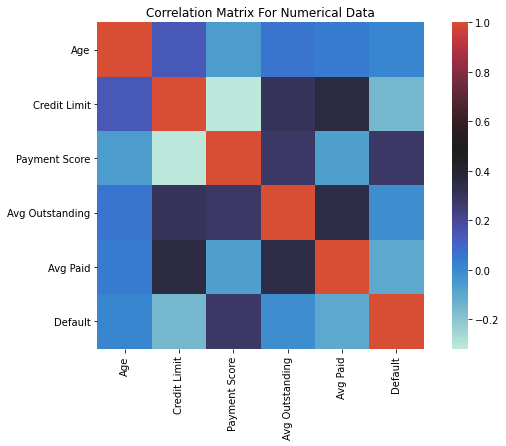

In [38]:
#Generating heat maps to observe trends in data
plt.figure(figsize=(10,6))
sns.heatmap(DF.corr(), square=True, center=0.5, yticklabels=True).set_title('Correlation Matrix For Numerical Data')
plt.show()

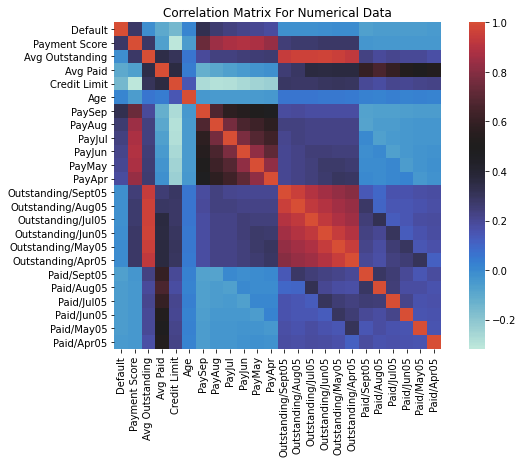

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(DF2.corr(), square=True, center=0.5, yticklabels=True).set_title('Correlation Matrix For Numerical Data')
plt.show()

#### Pair Plots

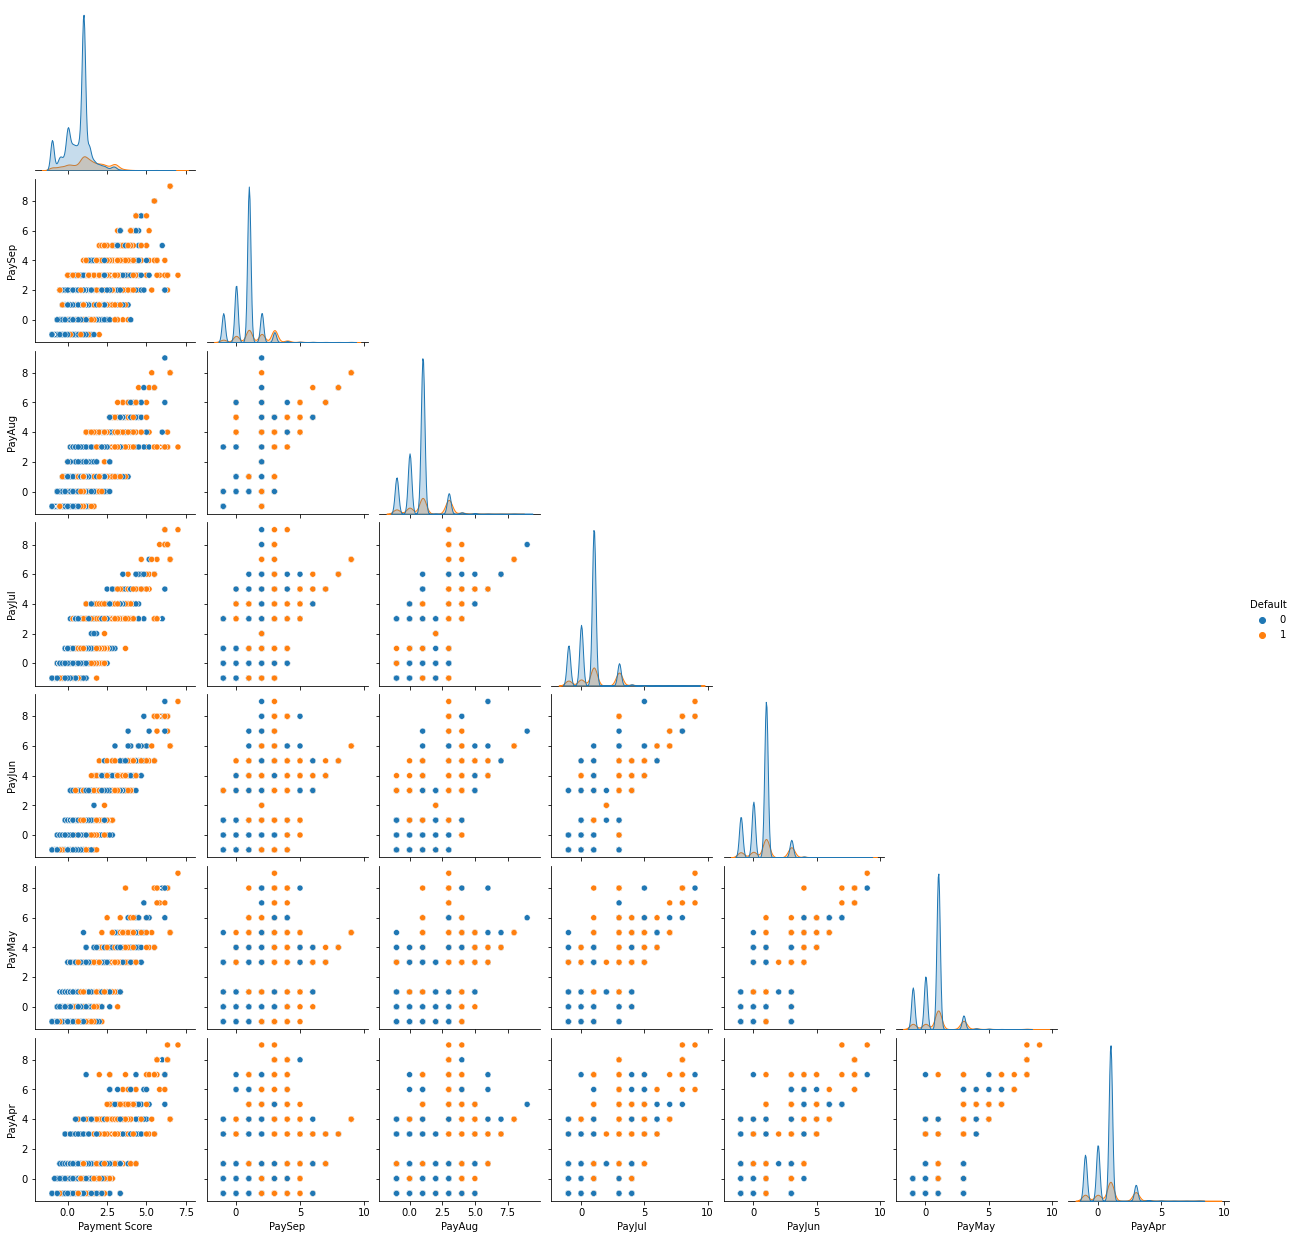

In [41]:
sns.pairplot(data=DF2[['Payment Score','PaySep','PayAug','PayJul','PayJun','PayMay','PayApr','Default']],hue='Default',corner='True')

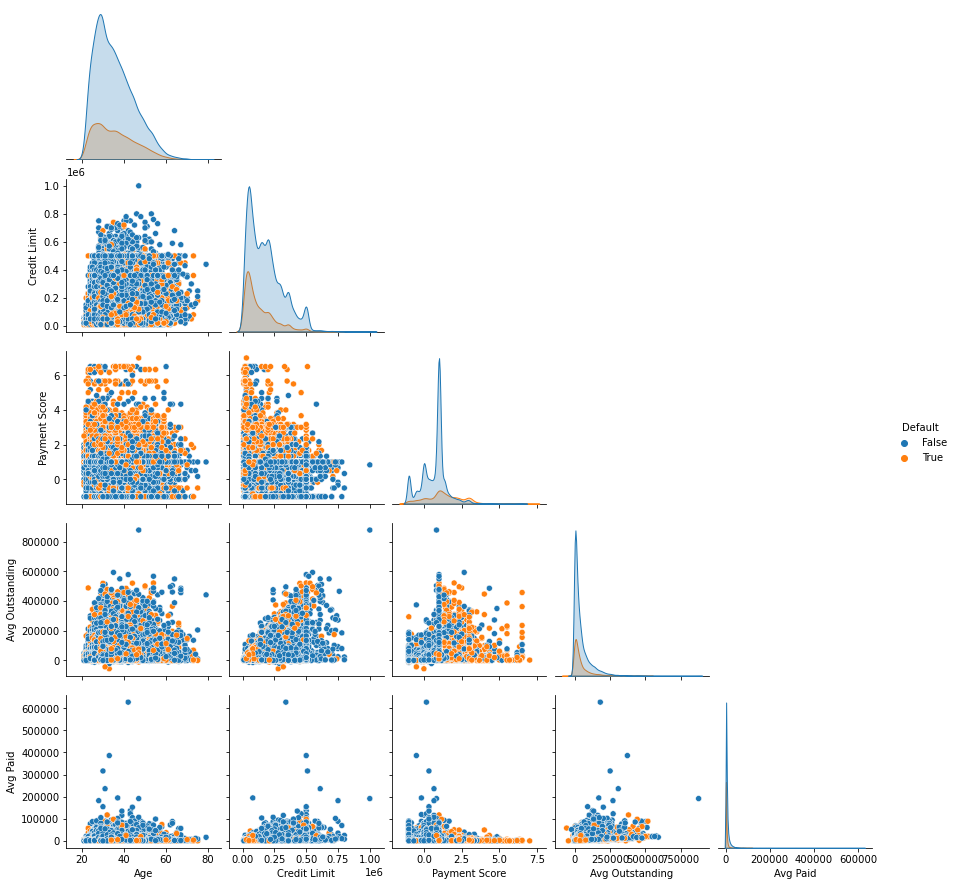

In [42]:
sns.pairplot(data=DF, hue="Default", corner="True")

From these Heatmaps and pairplots, an understanding of how each variable relates to the Default variable. by using a summative heat map to show trend magnitudes and using a scatter distribuiton to outline overall spread of the data, and observe the degree of wildpoints and further characterize or reject trends exhibited in heat maps according to analytics seen in both preliminary visualizations. 

### Secondary Visualizations

From the above visualizations trends in Credit limit, Age, Payment Score, and the responsive Payment Default vatiable were singled out to be further analyzed using secondary visualizations. 

In [ ]:
sns.jointplot(data=df, x='Age', y='Credit Limit',kind = 'hex',color='red')
sns.jointplot(data=df, x='Default', y='Credit Limit',kind = 'hex',color='blue')
sns.despine()

In [ ]:
sns.violinplot(data=df, y='Credit Limit', x='Default').set(title='Payment defaults as a function of credit limit'
                                                   ,xlabel='Payment Defaults)'
                                                   ,ylabel='Credit Limit')
bx = sns.stripplot(x='Default',
                   y = 'Credit Limit',
                   data = df,
                  palette='husl', alpha=0.05)

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
y = df['Default']
x=df['Credit Limit']
z=df['Age']
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Credit Limit')
ax.set_ylabel('Default')
ax.set_zlabel('Age')

plt.show()

In [ ]:
sns.violinplot(data=df, y='Payment_Score', x='Default').set(title='Payment defaults as a function of Past Payment "Score"'
                                                   ,xlabel='Payment Defaults)'
                                                   ,ylabel='Payment Score')
bx = sns.stripplot(x='Default',
                   y = 'Payment Score',
                   data = df,
                  palette='husl', alpha=0.025)

This is what I have come up with

In [ ]:
plt.subplots(figsize=(20, 10))
ax = sns.lineplot(x="Credit Limit", y="Payment Score", hue="Default",data=df)
ax.set(xlim=(0,500000))
ax.set(ylim=(-.20,2.5))
plt.show()

ValueError: Could not interpret value `Payment_Score` for parameter `y`

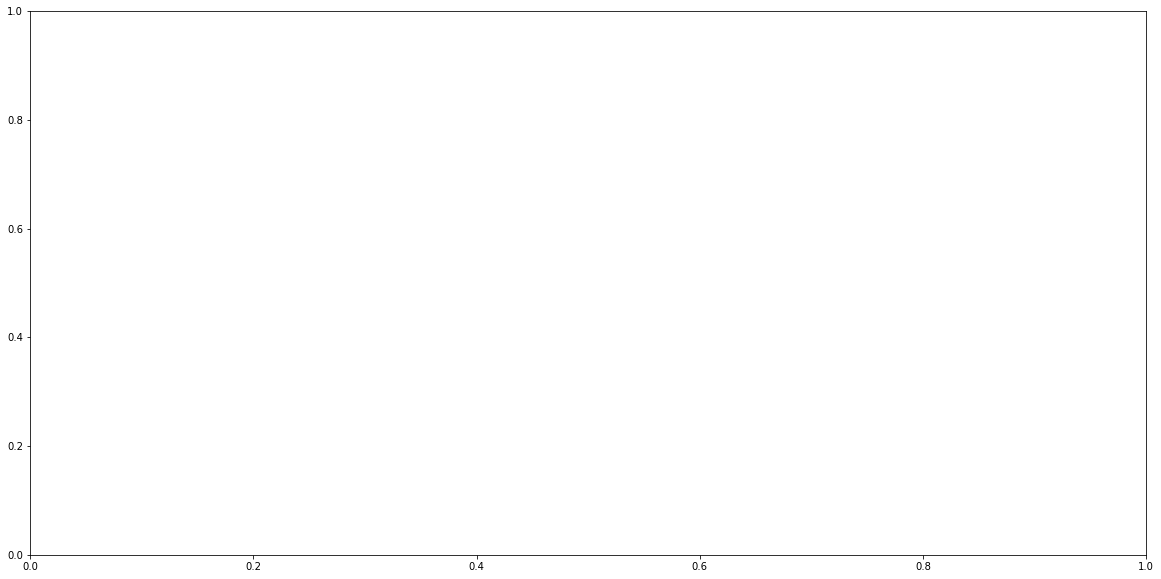

In [43]:
plt.subplots(figsize=(20, 10))
ax = sns.lineplot(x="Age", y="Payment Score", hue="Default",data=df)
ax.set(xlim=(20,75))
ax.set(ylim=(-.20,2.5))
plt.show()